5. Criação de Modelos de Machine Learning

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Importa o dataframe com base no csv após processamento:
final_df = pd.read_csv('final_df.csv')
final_df['weekday'] = pd.to_datetime(final_df['order_date']).dt.dayofweek
# final_df

# Importa o dataframe com base no csv após processamento:
aggregated_df = pd.read_csv('aggregated_df.csv')
aggregated_df

,order_date,city,delivery_order_count,paused_time_minutes,speed_time_minutes,transit_time_minutes,delivery_distance_meters,average_retail_price,weekday,product,state
0,2021-01-01,CURITIBA,12,0.762500,4.155000,11.009167,2709.416667,4.172,4,GASOLINA COMUM,PR
1,2021-01-01,PORTO ALEGRE,77,4.979753,7.069877,19.681852,3426.333333,4.626,4,GASOLINA COMUM,RS
2,2021-01-01,RIO DE JANEIRO,217,3.880779,7.315281,20.144026,2704.995671,4.968,4,GASOLINA COMUM,RJ
3,2021-01-01,SÃO PAULO,305,11.552849,15.456395,28.905843,3042.404070,4.235,4,GASOLINA COMUM,SP
4,2021-01-02,CURITIBA,156,2.226875,6.645500,13.062812,2914.125000,4.172,5,GASOLINA COMUM,PR
...,...,...,...,...,...,...,...,...,...,...,...
475,2021-04-29,SÃO PAULO,848,6.425263,11.458619,21.194030,3093.800228,5.265,3,GASOLINA COMUM,SP
476,2021-04-30,CURITIBA,167,2.140520,6.640116,14.053584,2804.543353,5.311,4,GASOLINA COMUM,PR
477,2021-04-30,PORTO ALEGRE,255,2.166977,4.569651,17.334070,3389.387597,5.781,4,GASOLINA COMUM,RS
478,2021-04-30,RIO DE JANEIRO,497,4.069449,8.203137,22.055760,2690.323194,6.099,4,GASOLINA COMUM,RJ


Mean Squared Error: 132330.63
R^2 Score: 0.58


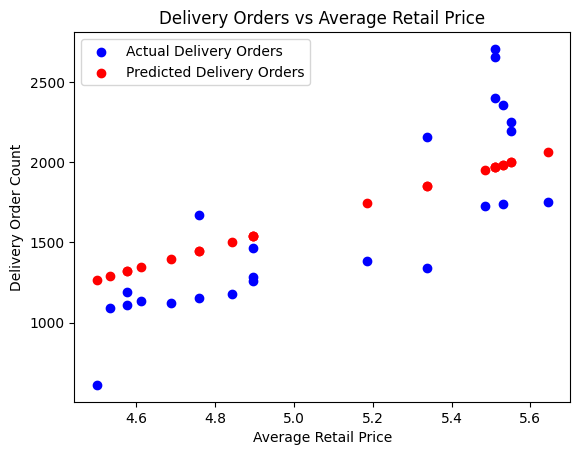

In [129]:
# Carregando os dados (supondo que aggregated_df já está carregado)
aggregated_df['order_date'] = pd.to_datetime(aggregated_df['order_date'])

# Agrupando os dados por data
daily_data = aggregated_df.groupby('order_date').agg({
    'delivery_order_count': 'sum',
    'average_retail_price': 'mean'
}).reset_index()

# Separando variáveis independentes (X) e dependentes (y)
X = daily_data[['average_retail_price']]
y = daily_data['delivery_order_count']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualizando os resultados
plt.scatter(X_test, y_test, color='blue', label='Actual Delivery Orders')
plt.scatter(X_test, y_pred, color='red', label='Predicted Delivery Orders')
plt.xlabel('Average Retail Price')
plt.ylabel('Delivery Order Count')
plt.title('Delivery Orders vs Average Retail Price')
plt.legend()
plt.show()
